In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N_points = 41 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 2 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-3,0,1) ]) # Alpha (regularization strength) of ridge regression
lasso_eps = 0.001
lasso_nalpha=20
lasso_iter=1000
degree_min = 2
degree_max = 8

In [3]:
x_smooth = np.array(np.linspace(x_min,x_max,1001))

In [4]:
# Linearly spaced sample points
X=np.array(np.linspace(x_min,x_max,N_points))

# Samples drawn from uniform random distribution
X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)

In [5]:
def func(x):
    result = x**2*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

In [6]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [7]:
y = func(X)+noise_x
y_sampled = func(X_sample)+noise_x

In [8]:
df = pd.DataFrame(data=X,columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=X_sample
df['y_sampled']=y_sampled
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.000,0.761394,-1.566482,4.656746,-15.918912
1,1.225,1.249025,0.973355,4.077757,-9.182027
2,1.450,1.805456,3.668242,6.313265,2.500359
3,1.675,2.360061,2.887801,3.218872,-0.052018
4,1.900,2.825011,3.219761,2.033253,3.413888


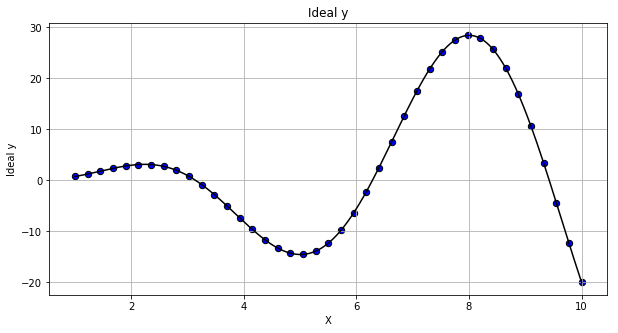

In [9]:
df.plot.scatter('X','Ideal y',title='Ideal y',grid=True,edgecolors=(0,0,0),c='blue',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

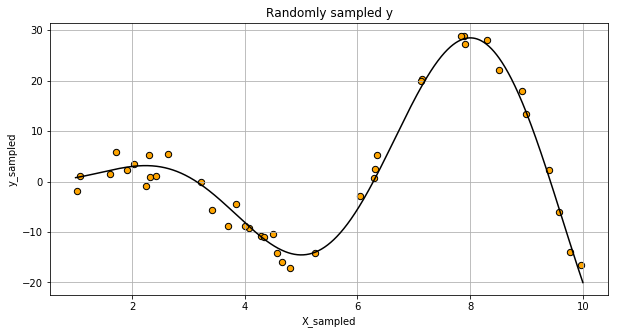

In [10]:
df.plot.scatter('X_sampled',y='y_sampled',title='Randomly sampled y',
                grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

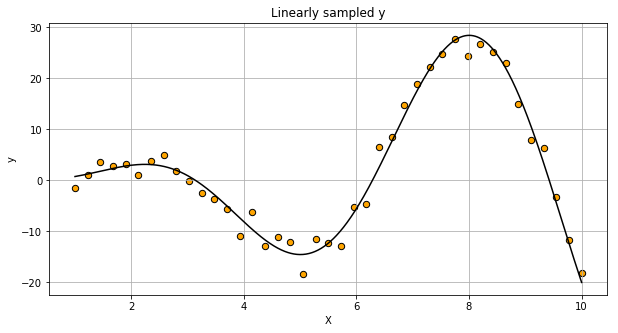

In [11]:
df.plot.scatter('X',y='y',title='Linearly sampled y',grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

Test score of model with degree 2: -0.04323708983722585

Test score of model with degree 3: -0.04323708983722607



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 4: 0.09365803380879467

Test score of model with degree 5: 0.2942094903725706



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 6: 0.5078727869614987

Test score of model with degree 7: 0.6519272435828123



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 8: 0.6929923646710744



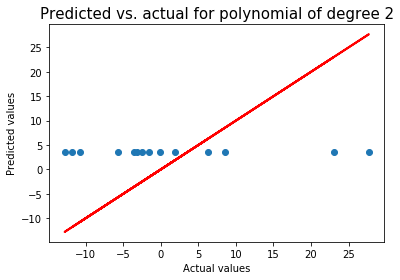

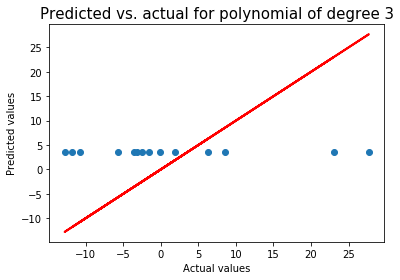

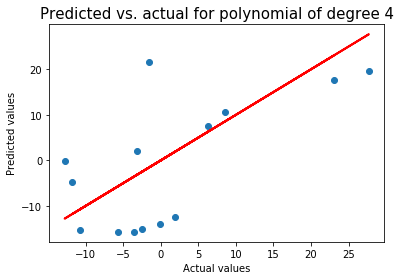

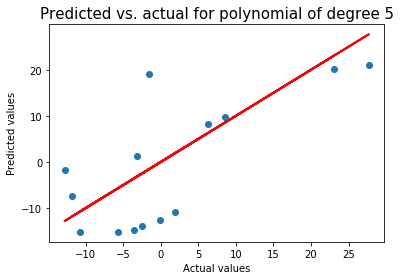

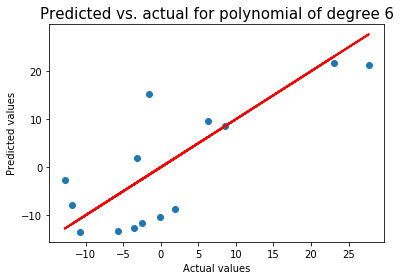

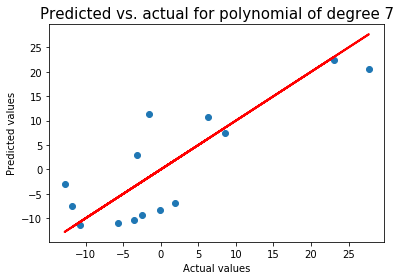

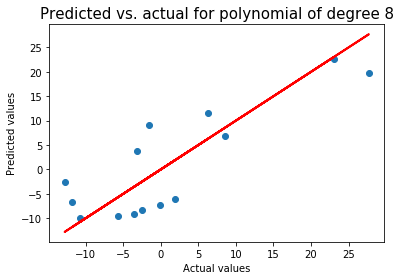

In [14]:
linear_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    #model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  max_iter=lasso_iter,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    linear_sample_score.append(test_score)
    poly_degree.append(degree)
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [15]:
linear_sample_score

[-0.043237089837225851,
 -0.043237089837226073,
 0.093658033808794672,
 0.2942094903725706,
 0.50787278696149873,
 0.65192724358281229,
 0.69299236467107439]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['X_sampled'], df['y_sampled'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

Test score of model with degree 2: -0.12434801463459723

Test score of model with degree 3: -0.0769230959117706



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 4: 0.6735234335237947

Test score of model with degree 5: 0.7969653226807432



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 6: 0.8321225592878035

Test score of model with degree 7: 0.8124366657216142



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 8: 0.7813750489160156



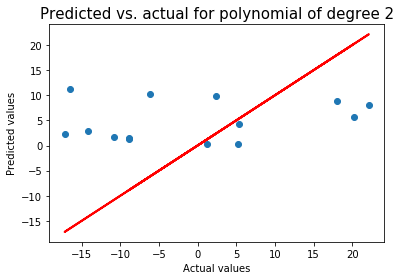

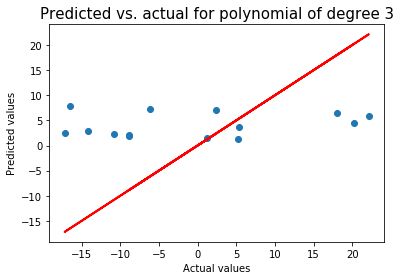

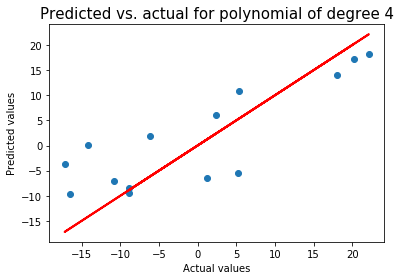

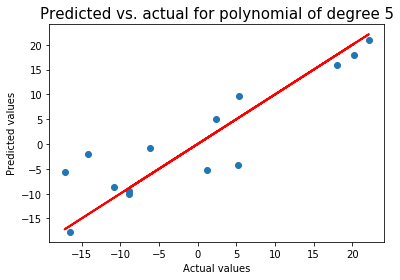

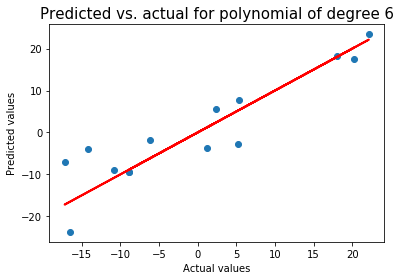

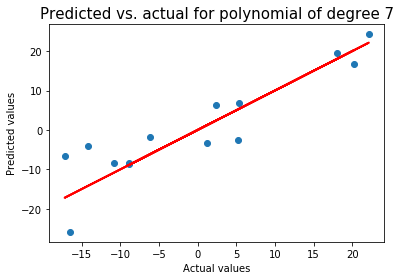

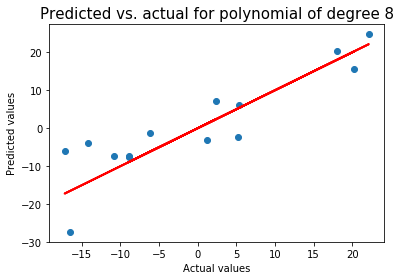

In [17]:
random_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    #model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  max_iter=lasso_iter,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    random_sample_score.append(test_score)
    poly_degree.append(degree)
    
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [18]:
random_sample_score

[-0.12434801463459723,
 -0.0769230959117706,
 0.67352343352379473,
 0.79696532268074316,
 0.83212255928780354,
 0.81243666572161422,
 0.78137504891601561]

In [19]:
df_score = pd.DataFrame(data={'degree':[d for d in range(degree_min,degree_max+1)],
                              'Linear sample score':linear_sample_score,
                              'Random sample score':random_sample_score})
df_score

,Linear sample score,Random sample score,degree
0,-0.043237,-0.124348,2
1,-0.043237,-0.076923,3
2,0.093658,0.673523,4
3,0.294209,0.796965,5
4,0.507873,0.832123,6
5,0.651927,0.812437,7
6,0.692992,0.781375,8


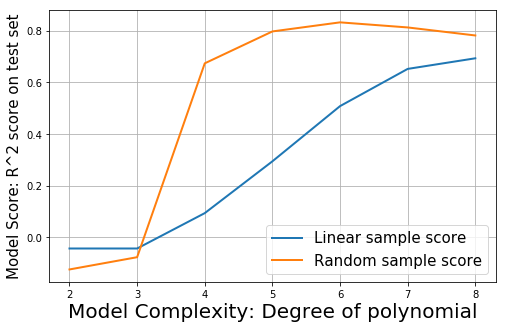

In [28]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(df_score['degree'],df_score['Linear sample score'],lw=2)
plt.plot(df_score['degree'],df_score['Random sample score'],lw=2)
plt.xlabel ("Model Complexity: Degree of polynomial",fontsize=20)
plt.ylabel ("Model Score: R^2 score on test set",fontsize=15)
plt.legend(fontsize=15)

In [21]:
m=model.steps[1][1]
m.alpha_

0.021486111550969477